<a href="https://colab.research.google.com/github/Chen-Wi-Ki/Colab-DogCat-CNN/blob/main/Sin_Test_for_CNN_N_Value_Verify6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sin波不同頻率用來測試CNN的N值判斷是否能夠正確判別。

**此Sin波模擬類似上肢啞鈴曲舉的前臂角度變化或加速度變化，用於分析六軸感測系統IMU之分析方法。**

Lv1-正常,訓練量3張

Lv2-亞健康,訓練量3張

Lv3-中途放棄,訓練量12張

## 雲端硬碟權限指令

In [1]:
#讀雲端資料存取方法
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Main路徑測試
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證

'Sin Test for CNN N Value Verify3.ipynb'   test1
 SinWaveEventTest.ipynb			   train


## 頻率1.5Hz組(健康)

▼模擬sin波的數據,推遲0秒,訓練成:Lv1(正常)▼


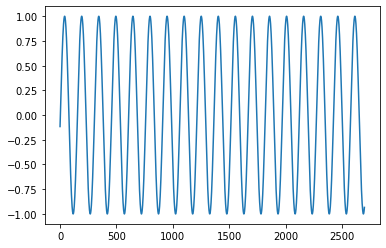

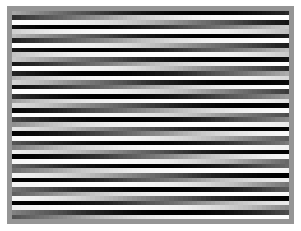

▼模擬sin波的數據,推遲1秒,訓練成:Lv1(正常)▼


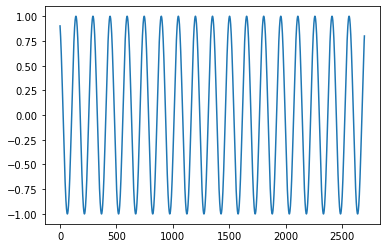

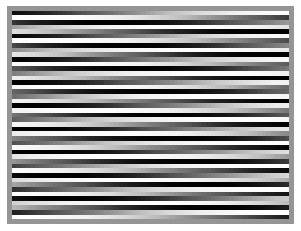

▼模擬sin波的數據,推遲2秒,訓練成:Lv1(正常)▼


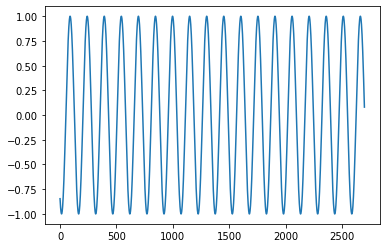

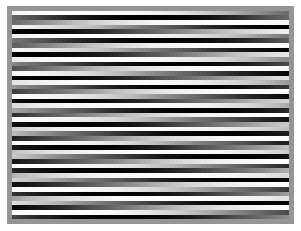

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=1.5Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=1

for i in range(0,3,1):
  x=np.arange(0,45*np.pi,0.0415)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  
  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(3000,)轉成(3000,1)是否有問題,波形圖
  plt.show()

  #調整維度成45:60並新開一個變數儲存
  y_sin45x60point = y_sin2700point.reshape(45,60)
  
  #加白色外框避免失真
  zero_set=np.zeros([47,62])
  data47x62=np.pad(y_sin45x60point,1)
  data = zero_set+data47x62

  #輸出灰階圖
  plt.axis('off')
  plt.imshow(data,cmap='Greys')
  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train/Lv%d.%d.png' %(Lv,i))
  plt.savefig(SavePath, transparent=True, pad_inches=0)
  plt.show()
  

### 頻率1.5Hz組,中斷結果模擬

▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼


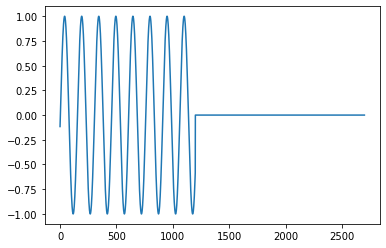

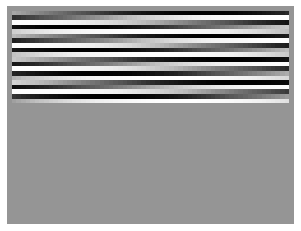

▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼


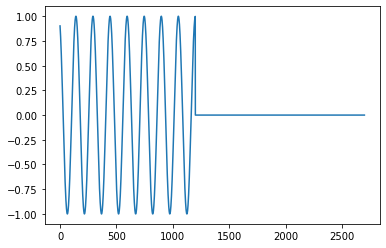

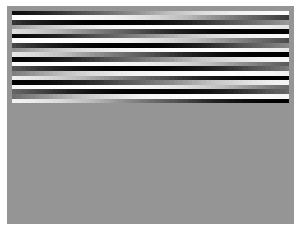

▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼


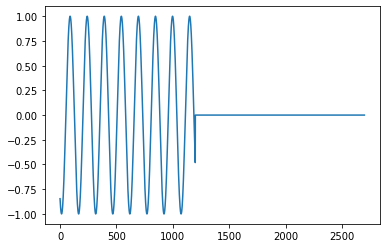

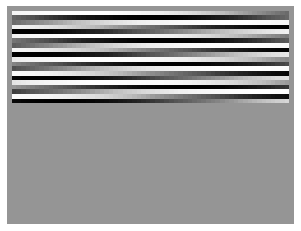

▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼


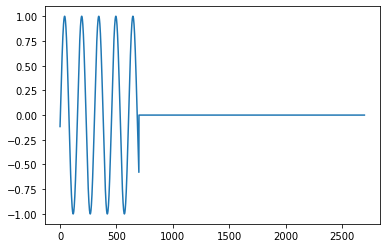

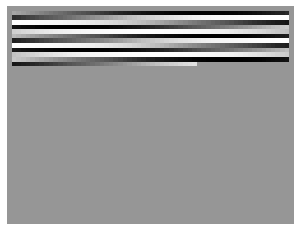

▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼


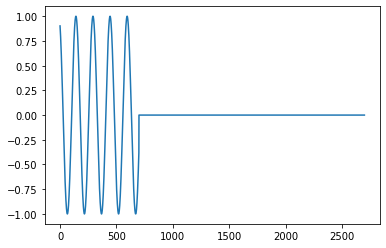

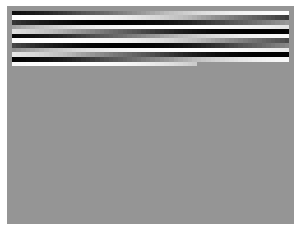

▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼


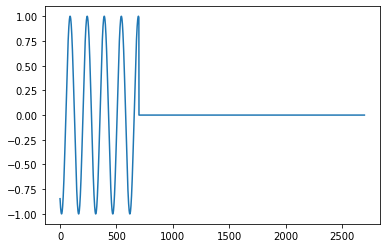

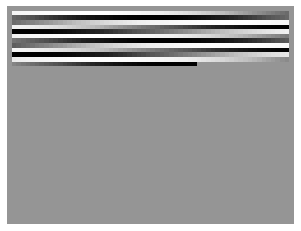

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=1.5Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=3

for i in range(0,6,1):
  x=np.arange(0,45*np.pi,0.0415)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]

  elif i==3:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==4:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==5:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]

  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(3000,)轉成(3000,1)是否有問題,波形圖
  plt.show()

  #調整維度成45:60並新開一個變數儲存
  y_sin45x60point = y_sin2700point.reshape(45,60)
  
  #加白色外框避免失真
  zero_set=np.zeros([47,62])
  data47x62=np.pad(y_sin45x60point,1)
  data = zero_set+data47x62

  #輸出灰階圖
  plt.axis('off')
  plt.imshow(data,cmap='Greys')
  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train/Lv%d.%d.png' %(Lv,i))
  plt.savefig(SavePath, transparent=True, pad_inches=0)
  plt.show()
  

## 頻率3Hz組(亞健康~衰弱)

▼模擬sin波的數據,推遲0秒,訓練成:Lv3(亞健康))▼


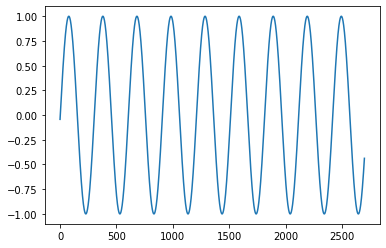

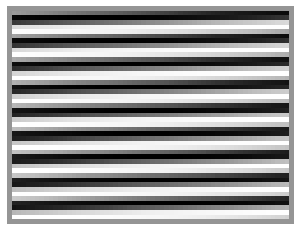

▼模擬sin波的數據,推遲1秒,訓練成:Lv3(亞健康)▼


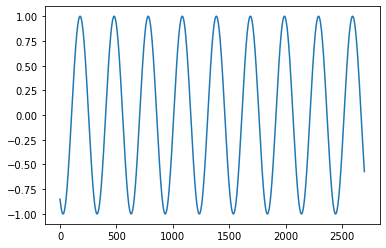

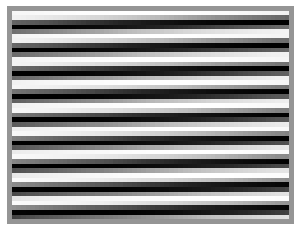

▼模擬sin波的數據,推遲2秒,訓練成:Lv3(亞健康)▼


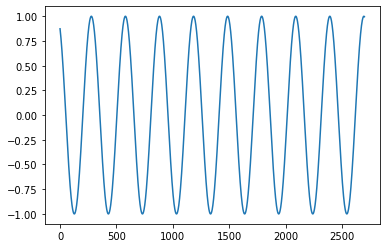

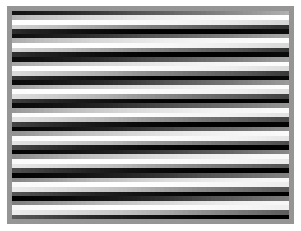

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=3Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=2

for i in range(0,3,1):
  x=np.arange(0,22*np.pi,0.0208)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv3(亞健康))▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv3(亞健康)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv3(亞健康)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(3000,)轉成(3000,1)是否有問題,波形圖
  plt.show()

  #調整維度成45:60並新開一個變數儲存
  y_sin45x60point = y_sin2700point.reshape(45,60)
  
  #加白色外框避免失真
  zero_set=np.zeros([47,62])
  data47x62=np.pad(y_sin45x60point,1)
  data = zero_set+data47x62

  #輸出灰階圖
  plt.axis('off')
  plt.imshow(data,cmap='Greys')
  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train/Lv%d.%d.png' %(Lv,i))
  plt.savefig(SavePath, transparent=True, pad_inches=0)
  plt.show()
  

### 頻率3Hz組,中斷結果模擬

▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼


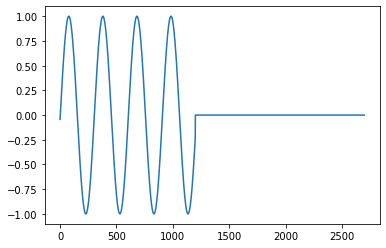

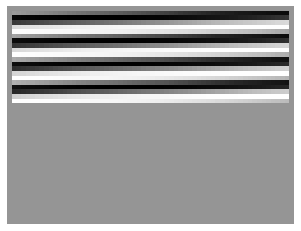

▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼


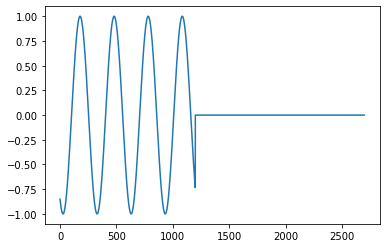

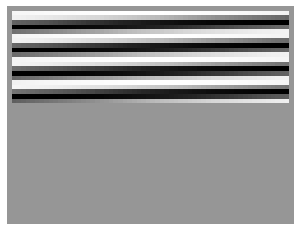

▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼


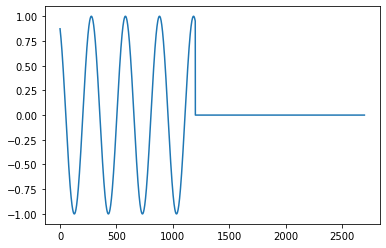

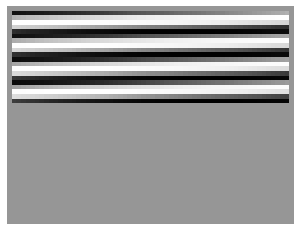

▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼


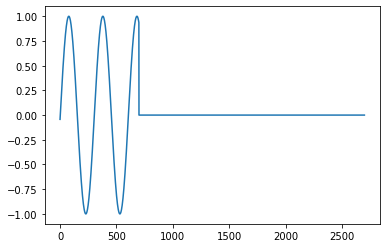

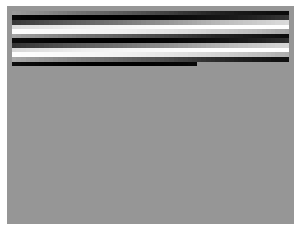

▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼


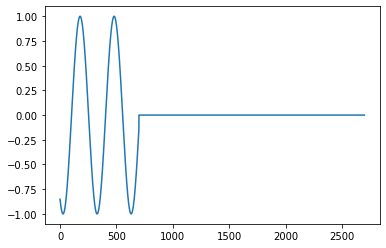

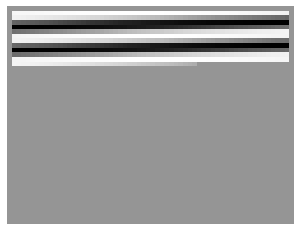

▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼


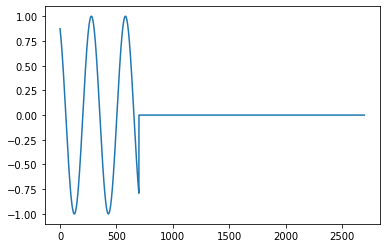

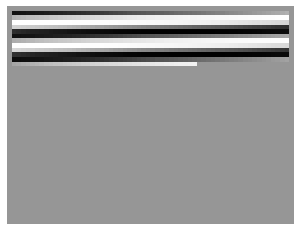

In [ ]:
#sin波形(模擬訊號偏強的圖 頻率=3Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=3

for i in range(6,12,1):
  x=np.arange(0,22*np.pi,0.0208)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==6:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==7:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==8:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]

  elif i==9:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==10:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==11:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]

  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(3000,)轉成(3000,1)是否有問題,波形圖
  plt.show()

  #調整維度成45:60並新開一個變數儲存
  y_sin45x60point = y_sin2700point.reshape(45,60)
  
  #加白色外框避免失真
  zero_set=np.zeros([47,62])
  data47x62=np.pad(y_sin45x60point,1)
  data = zero_set+data47x62

  #輸出灰階圖
  plt.axis('off')
  plt.imshow(data,cmap='Greys')
  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train/Lv%d.%d.png' %(Lv,i))
  plt.savefig(SavePath, transparent=True, pad_inches=0)
  plt.show()

## N值CNN程式

In [32]:
#訓練路徑測試
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train

Lv1.0.png  Lv1.2.png  Lv2.1.png  Lv3.0.png  Lv3.2.png
Lv1.1.png  Lv2.0.png  Lv2.2.png  Lv3.1.png


In [103]:
#讀圖測試
import numpy as np
import cv2
import os

train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train'
path = os.path.join(train_dir)
X = []
y = []

def Lv_convert(get_category):#訓練陣列指引
  if get_category=='Lv1':
    return 0
  elif get_category=='Lv2':
    return 1
  elif get_category=='Lv3':
    return 2

def create_train_data(path):#輸出訓練陣列
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = Lv_convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(432, 288))
        X.append(new_img_array)
        y.append(category)

create_train_data(path)

X = np.array(X).reshape(-1, 432, 288, 1)
y = np.array(y)
print(X.shape)
print(y.shape)
print(y)

(9, 432, 288, 1)
(9,)
[0 0 0 2 2 1 1 1 2]


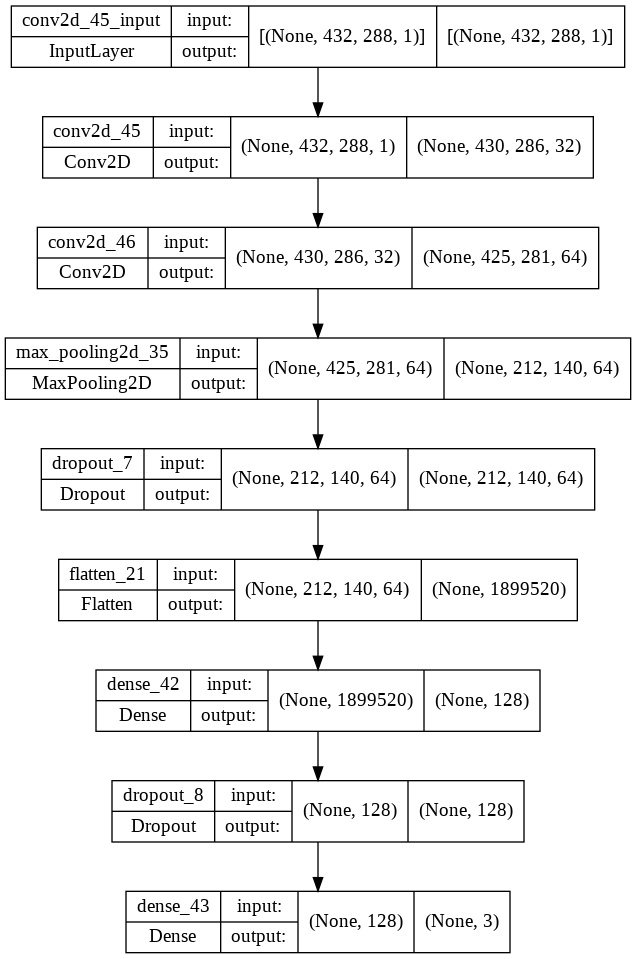

In [115]:
from tensorflow import keras
from tensorflow.keras import layers

CNN=keras.Sequential(name='SinWaveCNN')
CNN.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(432,288,1)))#第一層需有input_shape
#CNN.add(layers.MaxPooling2D((2,2)))
#CNN.add(layers.Dropout(0.3))
CNN.add(layers.Conv2D(64,(6,6),activation='relu'))
CNN.add(layers.MaxPooling2D((2,2)))
#CNN.add(layers.Dropout(0.3))
#CNN.add(layers.Conv2D(128,(3,3),activation='relu'))
#CNN.add(layers.MaxPooling2D((2,2)))
CNN.add(layers.Dropout(0.25))
CNN.add(layers.Flatten())

CNN.add(layers.Dense(128,activation='relu'))
CNN.add(layers.Dropout(0.5))
CNN.add(layers.Dense(3,activation='softmax'))#0~2(3 layer)

#CNN.add(layers.Dense(3, activation='sigmoid'))

keras.utils.plot_model(CNN,show_shapes=True)

In [116]:
CNN.compile(optimizer='Adam',
      loss=keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy'])

In [117]:
#訓練了第10次
CNN.fit(X, y, epochs=10, batch_size=32)
print(CNN.summary())

Epoch 1/10
1/1 [==============================] - 17s 17s/step - loss: 34.8362 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 15s 15s/step - loss: 27300.2227 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 15s 15s/step - loss: 18669.3750 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 20s 20s/step - loss: 8497.7979 - accuracy: 0.1111
Epoch 5/10
1/1 [==============================] - 16s 16s/step - loss: 927.5777 - accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 14s 14s/step - loss: 141.6065 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 14s 14s/step - loss: 14.0512 - accuracy: 0.6667
Epoch 8/10
1/1 [==============================] - 14s 14s/step - loss: 203.1344 - accuracy: 0.3333
Epoch 9/10
1/1 [==============================] - 14s 14s/step - loss: 54.6572 - accuracy: 0.3333
Epoch 10/10
1/1 [==============================] - 14s 14s/step - loss: 1.6231 - accuracy: 0.5556
Model: "S

In [118]:
#測試數據
import pandas as pd 
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/test1'
path = os.path.join(train_dir)
#os.listdir(path)
X_test = []
id_line = []
def create_test1_data(path):
  for p in os.listdir(path):
    id_line.append(p.split(".")[0])
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    #print(img_array.shape)
    new_img_array = cv2.resize(img_array, dsize=(432, 288))
    X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1, 432, 288)
X_test = X_test/255
predictions = CNN.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'id':id_line, '判斷':predicted_val})
print(submission_df)

   id  判斷
0  t3   0
1  t2   0
2  t1   0


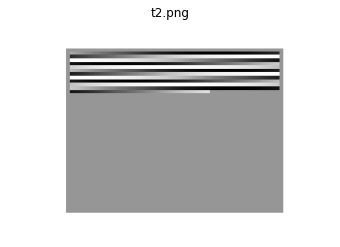

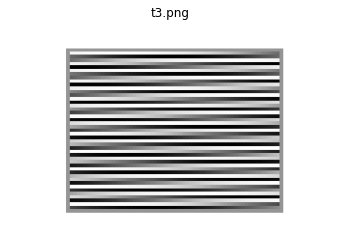

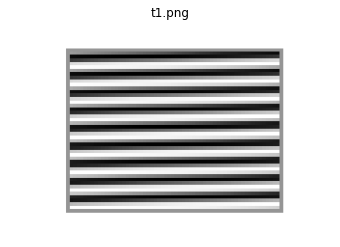

In [ ]:
from numpy.lib.type_check import imag
#讀取測試用圖片
import cv2
import numpy as np
import matplotlib.pyplot as plt
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/test1'
path = os.path.join(train_dir)

for p in os.listdir(path):
  plt.axis('off')
  id_line.append(p.split(".")[0])
  img = cv2.imread(os.path.join(path,p))
  #print(img_array.shape)
  plt.imshow(img,cmap='Greys')#轉換RGB後用plt輸出的結果(一般習慣是用這個)
  plt.title(p)
  plt.show()


# CNN 1維卷積算法

## 數據模擬1D

▼模擬sin波的數據,推遲0秒,訓練成:Lv1(正常)▼


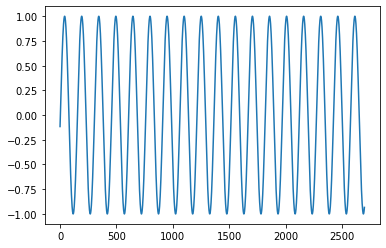

▼模擬sin波的數據,推遲1秒,訓練成:Lv1(正常)▼


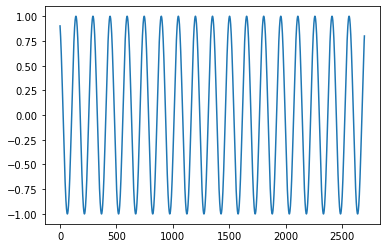

▼模擬sin波的數據,推遲2秒,訓練成:Lv1(正常)▼


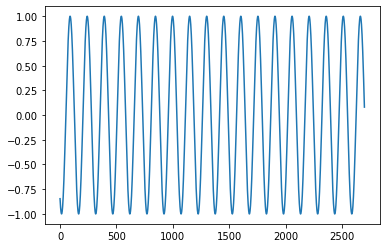

In [133]:
#sin波形(模擬訊號偏強的圖 頻率=1.5Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=1

for i in range(0,3,1):
  x=np.arange(0,45*np.pi,0.0415)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv1(正常)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    Lv=1
  
  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()

  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train1D/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)

▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼


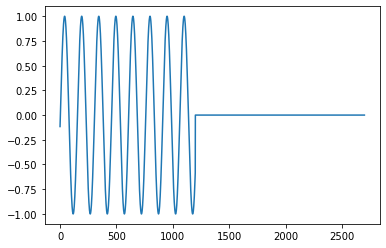

▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼


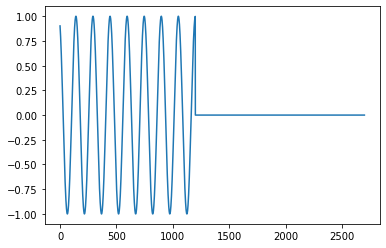

▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼


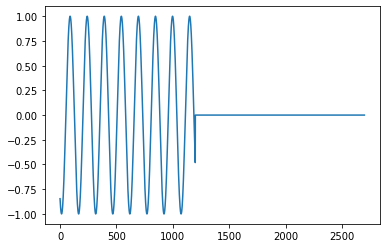

▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼


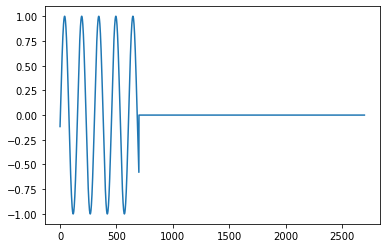

▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼


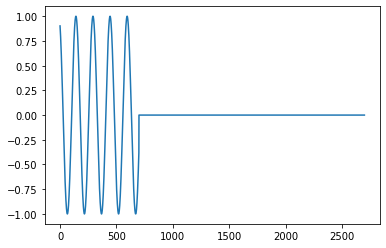

▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼


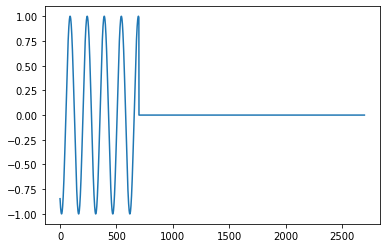

In [156]:
#sin波形(模擬訊號偏強的圖 頻率=1.5Hz 中斷訊號)
import numpy as np
from matplotlib import pyplot as plt

Lv=3

for i in range(0,6,1):
  x=np.arange(0,45*np.pi,0.0415)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]

  elif i==3:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv5(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==4:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==5:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv5(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]

  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()

  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train1D/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)
  

▼模擬sin波的數據,推遲0秒,訓練成:Lv3(亞健康))▼


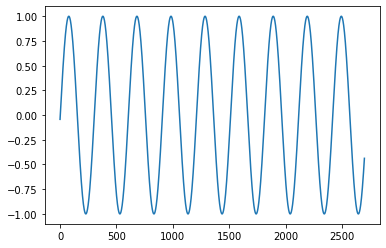

▼模擬sin波的數據,推遲1秒,訓練成:Lv3(亞健康)▼


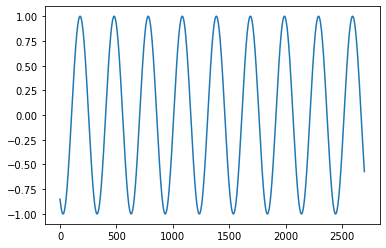

▼模擬sin波的數據,推遲2秒,訓練成:Lv3(亞健康)▼


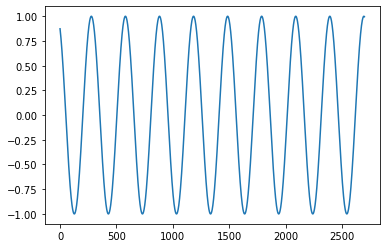

In [155]:
#sin波形(模擬訊號偏強的圖 頻率=3Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=2

for i in range(0,3,1):
  x=np.arange(0,22*np.pi,0.0208)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==0:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv3(亞健康))▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  elif i==1:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv3(亞健康)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  elif i==2:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv3(亞健康)▼')
    y = np.insert(y,0,zero_set)
    y_sin3000point = y[0:3000]
    
  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()
  
  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train1D/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)

▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼


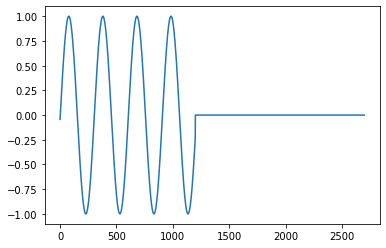

▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼


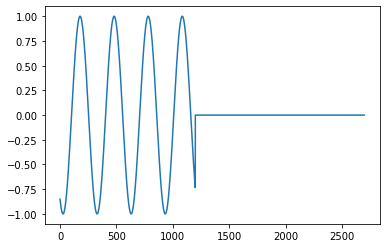

▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼


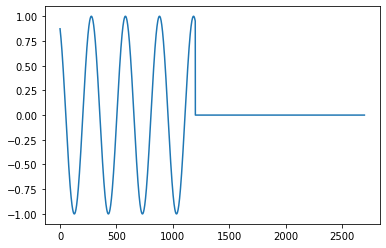

▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼


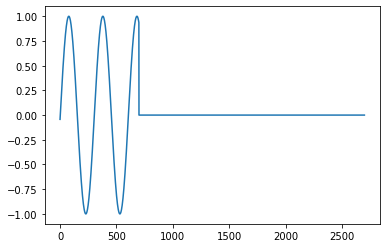

▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼


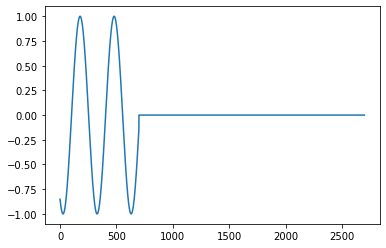

▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼


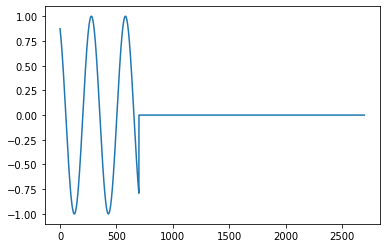

In [158]:
#sin波形(模擬訊號偏強的圖 頻率=3Hz)
import numpy as np
from matplotlib import pyplot as plt

Lv=4

for i in range(6,12,1):
  x=np.arange(0,22*np.pi,0.0208)
  #print(x.shape)
  y=np.sin(x)
  #print(y.shape)
  if i==6:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==7:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==8:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([1500])#刪除一半資料 
    y = np.insert(y,1500,zero_set2)
    y_sin3000point = y[0:3000]

  elif i==9:
    zero_set=np.zeros([0])#無平移
    print('▼模擬sin波的數據,推遲0秒,訓練成:Lv4(中途放棄))▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==10:
    zero_set=np.zeros([100])#平移1秒
    print('▼模擬sin波的數據,推遲1秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]
    
  elif i==11:
    zero_set=np.zeros([200])#平移2秒  
    print('▼模擬sin波的數據,推遲2秒,訓練成:Lv4(中途放棄)▼')
    y = np.insert(y,0,zero_set)
    zero_set2=np.zeros([2000])#刪除一半資料 
    y = np.insert(y,1000,zero_set2)
    y_sin3000point = y[0:3000]

  #print(y_sin3000point.shape)
  #扣除前300點(開始3秒因延遲與人為反應問題,所以不計算)
  y_sin2700point = y_sin3000point[300:3000]
  #print(y_sin2700point.shape)
  #調整維度1:2700
  y_sin2700point = y_sin2700point.reshape(1,2700)
  #print(y_sin1x2700point.T.shape)
  plt.axis('on')
  plt.plot(y_sin2700point.T)#確認(2700,)轉成(2700,1)是否有問題,波形圖
  plt.show()

  SavePath = ('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train1D/Lv%d.%d' % (Lv,i))
  np.save(SavePath,y_sin2700point)

## CNN方法

In [184]:
#讀圖測試
import numpy as np
import cv2
import os

train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/train1D'
path = os.path.join(train_dir)
X = []
y = []

def Lv_convert(get_category):#訓練陣列指引
  if get_category=='Lv1':
    return 0
  elif get_category=='Lv2':
    return 1
  elif get_category=='Lv3':
    return 2
  elif get_category=='Lv4':
    return 3

def create_train_data(path):#輸出訓練陣列
    for p in os.listdir(path):
        #print(os.path.join(path,p))
        category = p.split(".")[0]
        category = Lv_convert(category)
        img_array = np.load(os.path.join(path,p))
        #print(img_array)
        X.append(img_array)
        y.append(category)

create_train_data(path)

X = np.array(X).reshape(-1, 2700, 1)
y = np.array(y)
print('訓練資料集維度=',X.shape)
print('分級資料=',y)


訓練資料集維度= (18, 2700, 1)
分級資料= [0 0 0 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3]


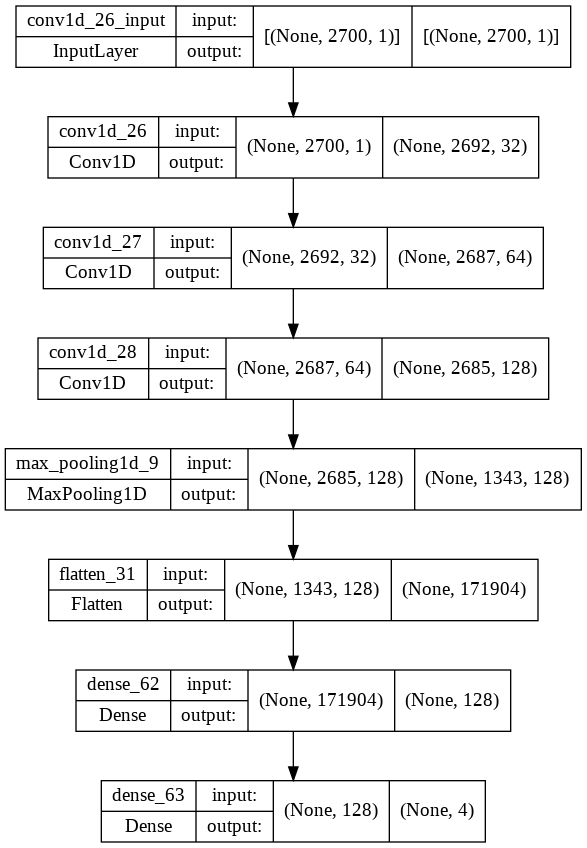

In [211]:
from tensorflow import keras
from tensorflow.keras import layers

CNN=keras.Sequential(name='SinWaveCNN')
CNN.add(layers.Conv1D(32,9,activation='relu',input_shape=(2700,1)))#第一層需有input_shape
CNN.add(layers.Conv1D(64,6,activation='relu'))
CNN.add(layers.Conv1D(128,3,activation='relu'))
CNN.add(layers.MaxPooling1D(pool_size=2,strides=2, padding='same'))
CNN.add(layers.Flatten())

CNN.add(layers.Dense(128,activation='relu'))
#CNN.add(layers.Dropout(0.5))
#CNN.add(layers.Dense(4,activation='softmax'))#0~3(4 layer)

CNN.add(layers.Dense(4, activation='sigmoid'))

keras.utils.plot_model(CNN,show_shapes=True)

In [212]:
CNN.compile(optimizer='Adam',
      loss=keras.losses.sparse_categorical_crossentropy,
      metrics=['accuracy'])

In [213]:
#訓練了第10次
CNN.fit(X, y, epochs=10, batch_size=32)
print(CNN.summary())

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.3916 - accuracy: 0.2222
Epoch 2/10
1/1 [==============================] - 0s 495ms/step - loss: 1.2646 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 485ms/step - loss: 2.1046 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 457ms/step - loss: 1.3449 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 485ms/step - loss: 0.6073 - accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 478ms/step - loss: 0.7231 - accuracy: 0.8333
Epoch 7/10
1/1 [==============================] - 0s 491ms/step - loss: 0.7306 - accuracy: 0.6111
Epoch 8/10
1/1 [==============================] - 0s 480ms/step - loss: 0.6235 - accuracy: 0.6111
Epoch 9/10
1/1 [==============================] - 0s 488ms/step - loss: 0.4889 - accuracy: 0.8889
Epoch 10/10
1/1 [==============================] - 0s 477ms/step - loss: 0.3982 - accuracy: 1.0000
Model: "SinWaveCNN"
__

In [214]:
#測試數據
import pandas as pd 
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/test1D'
path = os.path.join(train_dir)
#os.listdir(path)
X_test = []
id_line = []
def create_test1_data(path):
  for p in os.listdir(path):
    id_line.append(p.split(".")[0])
    img_array = np.load(os.path.join(path,p))
    #print(img_array.shape)
    X_test.append(img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1, 2700, 1)
X_test = X_test/255
predictions = CNN.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'id':id_line, '判斷':predicted_val})
print(submission_df)

   id  判斷
0  t1   0
1  t3   0
2  t2   0
3  t4   0


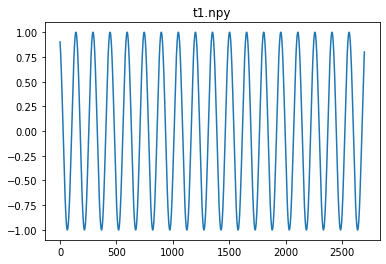

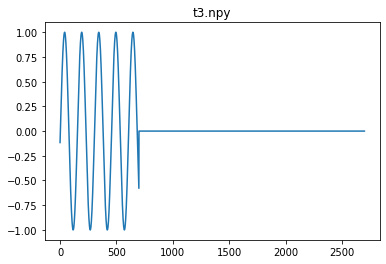

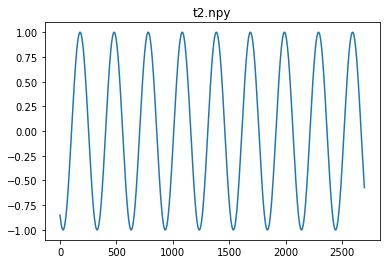

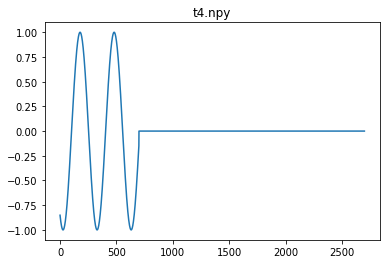

In [215]:
from numpy.lib.type_check import imag
#讀取測試用圖片
import cv2
import numpy as np
import matplotlib.pyplot as plt
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220623N值CNN驗證/test1D'
path = os.path.join(train_dir)

for p in os.listdir(path):
  id_line.append(p.split(".")[0])
  img = np.load(os.path.join(path,p))
  #print(img.shape)
  plt.plot(img.T)
  plt.title(p)
  plt.show()
